In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student_data.csv")
data.head()

,study_hours,attendance,previous_marks,result
0,2,60,45,0
1,3,65,50,0
2,4,70,55,1
3,5,75,60,1
4,6,80,65,1


In [3]:
X = data[['study_hours', 'attendance', 'previous_marks']]
y = data['result']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5


In [8]:
new_student = [[5, 72, 58]]  # study_hours, attendance, marks
prediction = model.predict(new_student)

if prediction[0] == 1:
    print("Prediction: PASS")
else:
    print("Prediction: FAIL")

Prediction: PASS


C:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


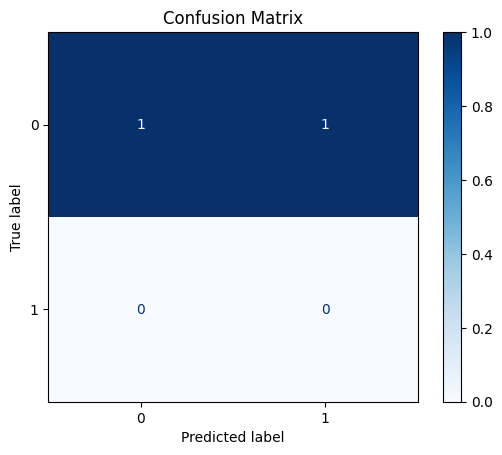

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

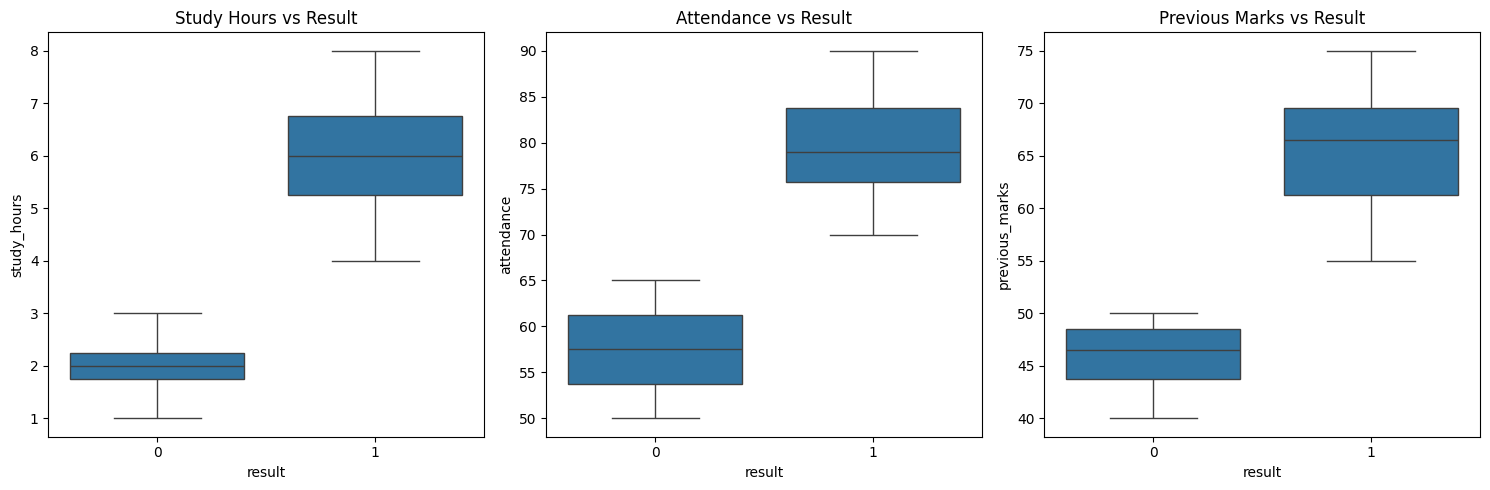

In [20]:
plot_data = X.copy()
plot_data['result'] = y

# Create box plots
plt.figure(figsize=(15,5))

# Study Hours vs Result
plt.subplot(1, 3, 1)
sns.boxplot(x='result', y='study_hours', data=plot_data)
plt.title('Study Hours vs Result')

# Attendance vs Result
plt.subplot(1, 3, 2)
sns.boxplot(x='result', y='attendance', data=plot_data)
plt.title('Attendance vs Result')

# Previous Marks vs Result
plt.subplot(1, 3, 3)
sns.boxplot(x='result', y='previous_marks', data=plot_data)
plt.title('Previous Marks vs Result')

plt.tight_layout()
plt.show()